<a href="https://colab.research.google.com/github/Jeidsgn/Dibujos_matematicos/blob/main/Lorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar librerías

In [16]:
!pip install ColabTurtlePlus
!pip install svgwrite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Atractor de Lorenz

In [2]:
# Importar las librerías necesarias
from ColabTurtlePlus.Turtle import *
import svgwrite
from math import atan2

# Inicializar la tortuga y configurar el lienzo
initializeTurtle()
speed(13)
pensize(1)
color('red')
setup (width=500, height=500)

# Definir las constantes y las variables iniciales
dt = 0.01
sigma = 15.0
beta = 2.667
rho = 21.0

x, y, z = 0.1, 1.0, 1.5
dx, dy, dz = 0.0, 0.0, 0.0
scale = 5

max_iterations = 1600
iteration = 0

# Crear una lista vacía para almacenar los fotogramas de la animación GIF
frames = []

# Crear un objeto para el dibujo SVG
dwg = svgwrite.Drawing('Lorenz.svg', size=('500px', '500px'))
dwg.viewbox(width=500, height=500)

# Crear una variable para almacenar la posición anterior de la tortuga
prev_pos = None
# Bucle while para calcular las nuevas posiciones y dibujar las líneas
while iteration < max_iterations:
    # Imprimir el número de iteración actual
    print("\rIteration:", iteration, end="")

    # Mover la tortuga a la nueva posición y orientarla hacia la dirección correcta
    goto((x) * scale, (z-20) * scale)
    setheading(atan2(dy, dx))    
        
    ## Dibujar una línea desde la posición anterior hasta la posición actual
    pos = ((x*scale)+250, ((70-z)*scale))
    if prev_pos:
        dwg.add(dwg.line(prev_pos, pos, stroke='black'))
    
    # Actualizar la posición anterior a la posición actual
    prev_pos = pos
    
    # Calcular las nuevas posiciones x, y, z según las ecuaciones diferenciales del Atractor de Lorenz
    dx = (sigma*(y - x)) * dt
    dy = (x*(rho - z) - y) * dt
    dz = (x*y - beta*z) * dt
    
    x += dx
    y += dy
    z += dz

    # Incrementar el contador de iteraciones
    iteration += 1

    # Salir del bucle si se ha alcanzado el número máximo de iteraciones
    if iteration == max_iterations:
        break
    

Iteration: 1482

# Archivo SVG

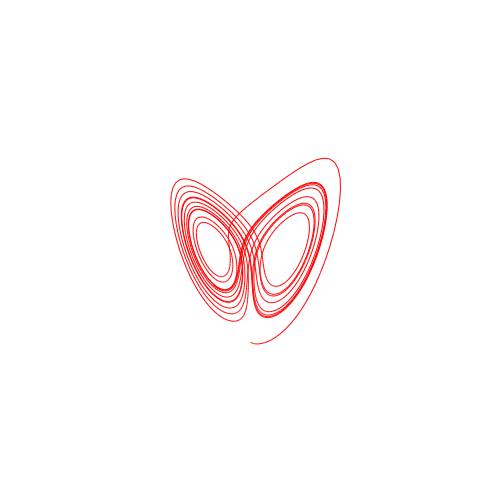

In [6]:
# Save the SVG file
dwg.save()

# Visualizar el dibujo SVG en la salida de la celda
from IPython.display import SVG, display
display(SVG(dwg.tostring()))